# 1) Import the necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#define working directory
os.chdir('G:')

# 2) Data Loading

In [3]:
EData=pd.read_csv('EmployeeData.csv')

In [4]:
EData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
EData.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


# 3)Data Cleaning

In [6]:
#gives the info about the data like datatypes of the each column
EData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# size of the data set
EData.shape

(14999, 10)

In [8]:
#statistics
EData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
EData.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [10]:
#drop duplicate rows if any
EData=EData.drop_duplicates(keep='first')

In [11]:
# size of the data set
EData.shape

(11991, 10)

# 4) Distribution of left

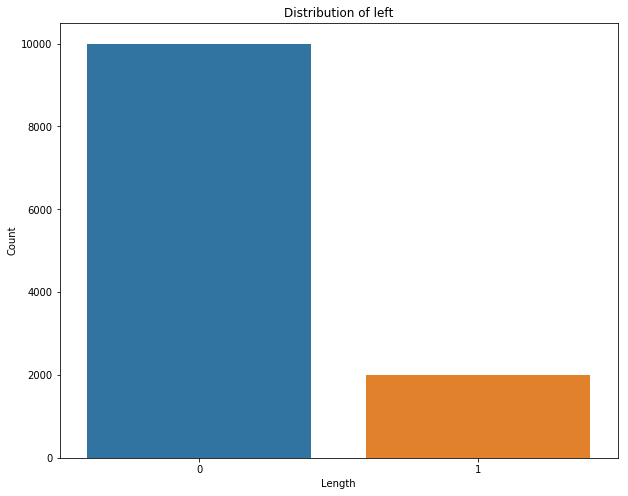

In [12]:
m =EData['left'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['left','Count']
plt.subplots(figsize=(10,8))
sns.barplot(y='Count', x='left', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of left")
plt.show()

# 5)Prediction Feature 

0    10000
1     1991
Name: left, dtype: int64

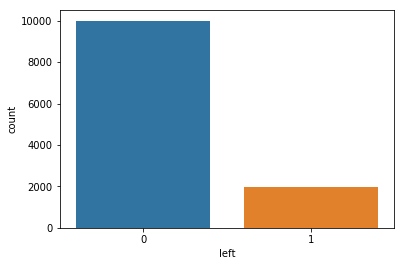

In [13]:
sns.countplot(x=EData.left)
EData['left'].value_counts()

# 6) Encoding techniques

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [15]:
EData.rename(columns={'sales':'Department'},inplace=True)

In [16]:
categorical_data = EData.select_dtypes(include=['object']).copy()
print(categorical_data.shape)
categorical_data.sample(5)

(11991, 2)


,Department,salary
998,marketing,medium
11175,product_mng,high
8504,accounting,medium
8408,sales,low
171,sales,low


In [17]:
EData['salary'].describe()

count     11991
unique        3
top         low
freq       5740
Name: salary, dtype: object

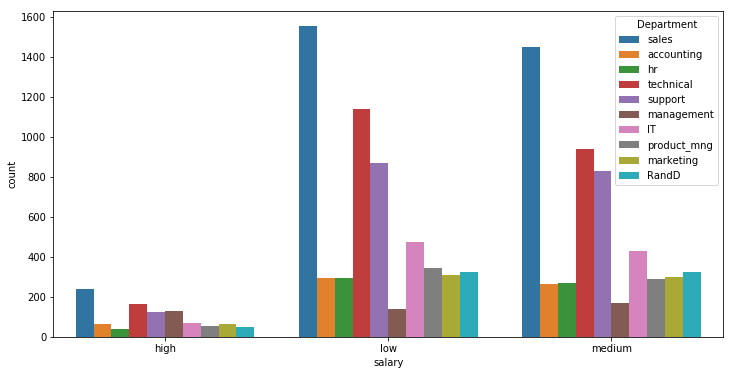

In [18]:
order_sub=sorted(categorical_data.salary.unique())
fig = plt.figure(figsize=(12,6))
sns.countplot(x=categorical_data.salary,
              data=categorical_data,
              order=order_sub,
              hue='Department')

In [19]:
salary_dict={'low': 1,'medium':2,'high':3}
EData['salary']=EData['salary'].map(salary_dict)

In [20]:
EData['salary'].value_counts()

1    5740
2    5261
3     990
Name: salary, dtype: int64

In [21]:
EData['Department'].describe()

count     11991
unique       10
top       sales
freq       3239
Name: Department, dtype: object

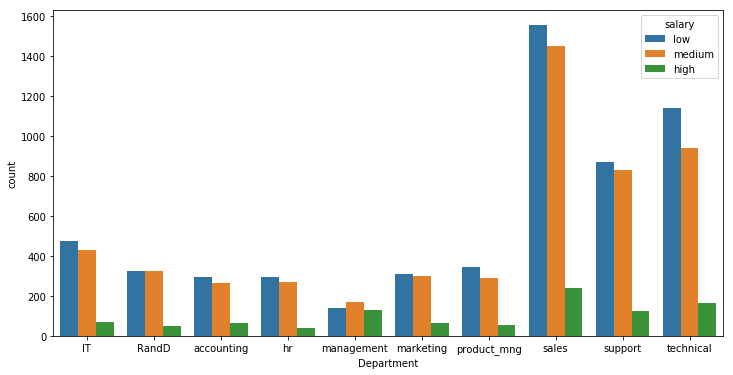

In [22]:
order_sub=sorted(categorical_data.Department.unique())
fig = plt.figure(figsize=(12,6))
sns.countplot(x=categorical_data.Department,
              data=categorical_data,
              order=order_sub,
              hue='salary')

In [23]:
EData['Department'] = le.fit_transform(EData['Department'])

In [24]:
EData['Department'].value_counts()

7    3239
9    2244
8    1821
0     976
1     694
6     686
5     673
2     621
3     601
4     436
Name: Department, dtype: int64

In [25]:
numeric_features=EData.select_dtypes(include=[np.number])
numeric_features.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [26]:
correlation=numeric_features.corr()
print(correlation['left'].sort_values(ascending=False),'\n')

left                     1.000000
time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
Department               0.018286
last_evaluation          0.013520
promotion_last_5years   -0.044657
salary                  -0.118882
Work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64 



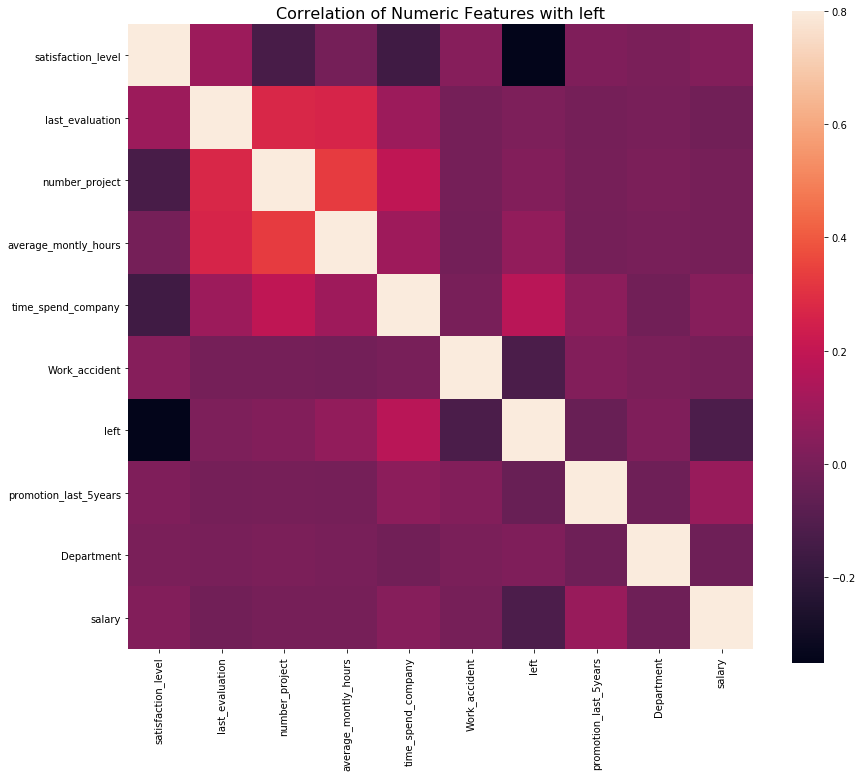

In [27]:
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of Numeric Features with left',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [28]:
numeric_data = EData.select_dtypes(exclude=['object']).copy()
print(numeric_data.shape)
numeric_data.columns

(11991, 10)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# Analysis on Numerical Data

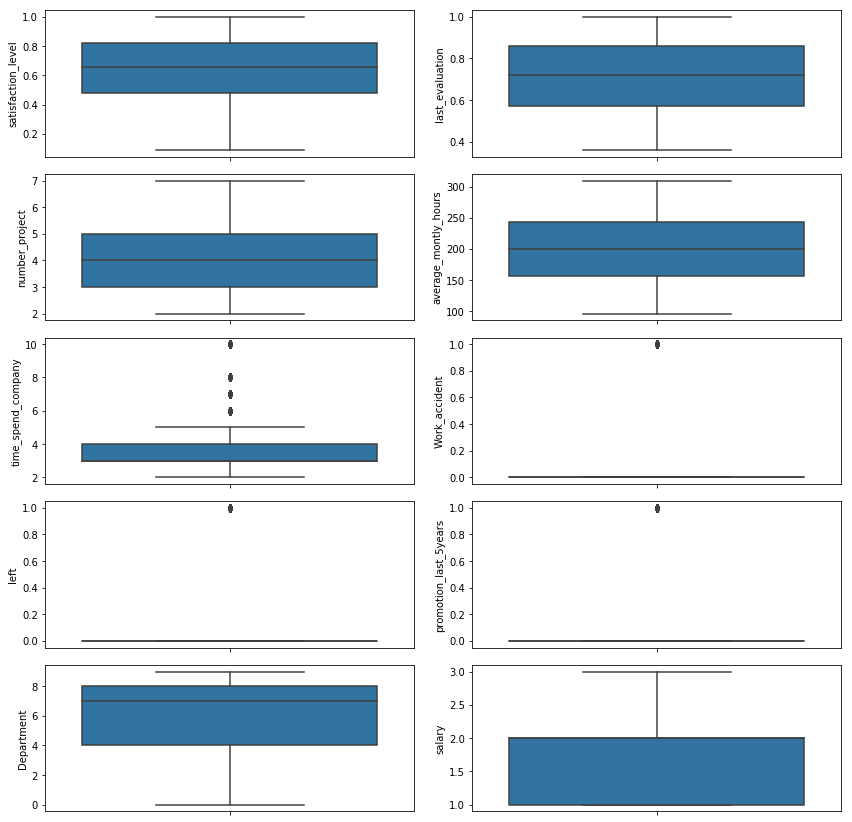

In [29]:
fig = plt.figure(figsize=(12,16))
for index,col in enumerate(numeric_features):
    plt.subplot(7,2,index+1)
    sns.boxplot(data = numeric_features, y = col)
fig.tight_layout(pad=1.0)

In [30]:
df=EData
print(EData.shape)
print(df.shape)
df.head()

(11991, 10)
(11991, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [31]:
df.to_csv('G:finalEdata.csv')